In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import loader
import plot
import helpers
import importlib
import joblib
importlib.reload(loader)
importlib.reload(plot)
importlib.reload(helpers)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import ShuffleSplit, cross_val_score, train_test_split, StratifiedKFold, learning_curve
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import RMSprop
from sklearn.ensemble import AdaBoostClassifier
from tensorflow.keras.optimizers import SGD
from sklearn.decomposition import FastICA, PCA, TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.random_projection import SparseRandomProjection
from kneed import KneeLocator
from scipy.stats import describe, kurtosis
from collections import defaultdict
from sklearn.cluster import KMeans
import time

from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import ShuffleSplit, cross_val_score, train_test_split, StratifiedKFold, learning_curve
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import RMSprop
from sklearn.ensemble import AdaBoostClassifier
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import adjusted_mutual_info_score as ami
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import pairwise_distances, mean_squared_error
from sklearn.mixture import GaussianMixture
from yellowbrick.cluster import InterclusterDistance
from sklearn.preprocessing import StandardScaler

In [2]:
data = loader.load_cancer_data()

In [3]:
features = [col for col in data.columns if col != "target"]
X = data[features]
y = data["target"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [154]:
# X_train.shape
X_test.shape

(114, 30)

In [67]:
# Normalize input data
scaler = MinMaxScaler()
standardizer = StandardScaler()

X_norm = scaler.fit_transform(X)
X_preprocessed = standardizer.fit_transform(X)

X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.fit_transform(X_test)

X_train_preprocessed = standardizer.fit_transform(X_train_norm)
X_test_preprocessed = standardizer.fit_transform(X_test_norm)

In [156]:
def build_best_classifier(learn_rate=0.01, momentum=0, hidden_layer_size=10):
    # Initialising the ANN
    classifier = Sequential()
    # Adding the input layer and the first hidden layer
    classifier.add(Dense(units = 30, activation = 'relu', input_dim=30))

    classifier.add(Dense(units = hidden_layer_size, activation = 'relu'))

    classifier.add(Dense(1, activation = 'sigmoid'))
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    classifier.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return classifier

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


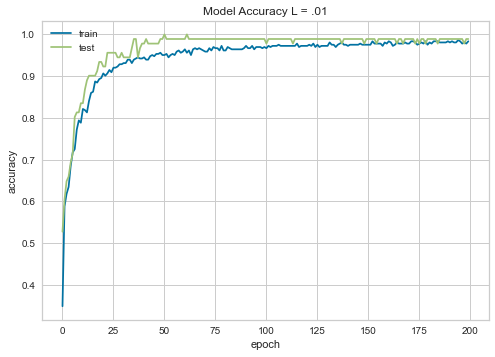

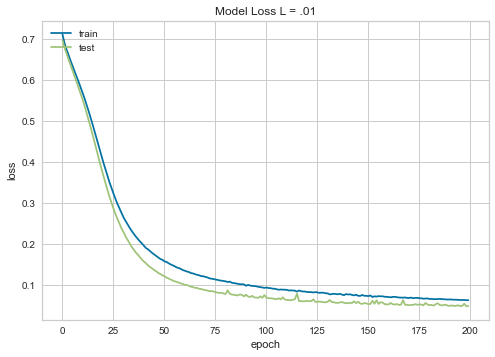

114/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.8947368

In [160]:
best_model = KerasClassifier(build_fn=build_best_classifier)
# Fit the model
start = time.perf_counter()
history = best_model.fit(X_train_norm, y_train, validation_split=0.2, epochs=200, batch_size=10, verbose=0)
nn_run_time = time.perf_counter() - start

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy L = .01')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss L = .01')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
best_model.score(X_test_norm, y_test)

In [161]:
nn_run_time

21.005247661989415

# NN with PCA

In [166]:
def build_best_classifier(learn_rate=0.01, momentum=0, hidden_layer_size=10):
    # Initialising the ANN
    classifier = Sequential()
    # Adding the input layer and the first hidden layer
    classifier.add(Dense(units = 6, activation = 'relu', input_dim=6))

    classifier.add(Dense(units = hidden_layer_size, activation = 'relu'))

    classifier.add(Dense(1, activation = 'sigmoid'))
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    classifier.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return classifier

In [167]:
km_pca_res = defaultdict(dict)
pca_6 = PCA(
    n_components=6,
    random_state=0,
)
pca_6_Xt_train = pca_6.fit_transform(X_train_norm)

In [168]:
pca_6_Xt_test = pca_6.fit_transform(X_test_norm)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


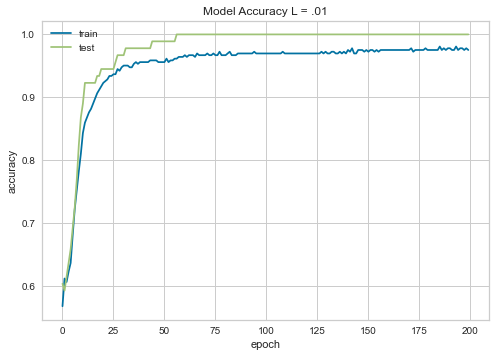

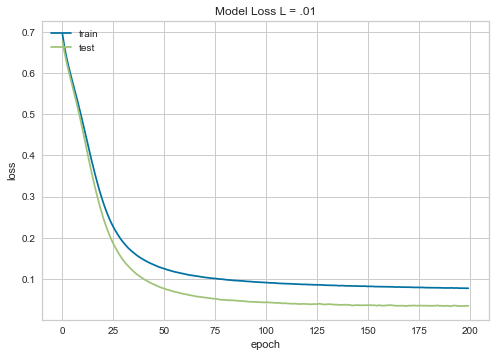

114/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [170]:
best_model = KerasClassifier(build_fn=build_best_classifier)
# Fit the model
start = time.perf_counter()
history = best_model.fit(pca_6_Xt_train, y_train, validation_split=0.2, epochs=200, batch_size=10, verbose=0)
nn_pca_run_time = time.perf_counter() - start
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy L = .01')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss L = .01')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
best_model.score(pca_6_Xt_test, y_test)
print(nn_pca_run_time)

# NN with ICA

In [171]:
ica29 = FastICA(
    random_state=0,
    n_components=29,
)
ica29_Xt_train = ica29.fit_transform(X_train_preprocessed)
ica29_Xt_test = ica29.fit_transform(X_test_preprocessed)

In [172]:
def build_best_classifier(learn_rate=0.01, momentum=0, hidden_layer_size=10):
    # Initialising the ANN
    classifier = Sequential()
    # Adding the input layer and the first hidden layer
    classifier.add(Dense(units = 29, activation = 'relu', input_dim=29))

    classifier.add(Dense(units = hidden_layer_size, activation = 'relu'))

    classifier.add(Dense(1, activation = 'sigmoid'))
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    classifier.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return classifier

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


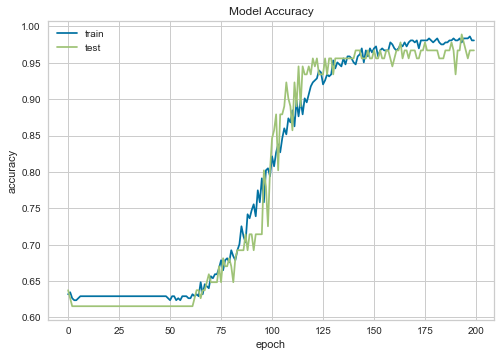

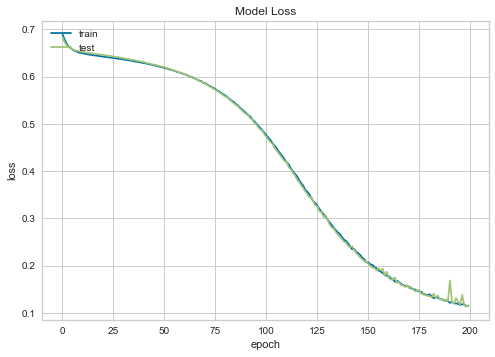

114/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [173]:
best_model = KerasClassifier(build_fn=build_best_classifier)
# Fit the model
start = time.perf_counter()
history = best_model.fit(ica29_Xt_train, y_train, validation_split=0.2, epochs=200, batch_size=10, verbose=0)
nn_ica_run_time = time.perf_counter() - start

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
best_model.score(ica29_Xt_test, y_test)
print(nn_ica_run_time)

# NN with RP

In [174]:
rp7 = SparseRandomProjection(n_components=7, random_state = 0)

rp_7_Xt_train = rp7.fit_transform(X_train_norm)
rp_7_Xt_test = rp7.fit_transform(X_test_norm)

In [175]:
def build_best_classifier(learn_rate=0.01, momentum=0, hidden_layer_size=10):
    # Initialising the ANN
    classifier = Sequential()
    # Adding the input layer and the first hidden layer
    classifier.add(Dense(units = 7, activation = 'relu', input_dim=7))

    classifier.add(Dense(units = hidden_layer_size, activation = 'relu'))

    classifier.add(Dense(1, activation = 'sigmoid'))
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    classifier.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return classifier

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


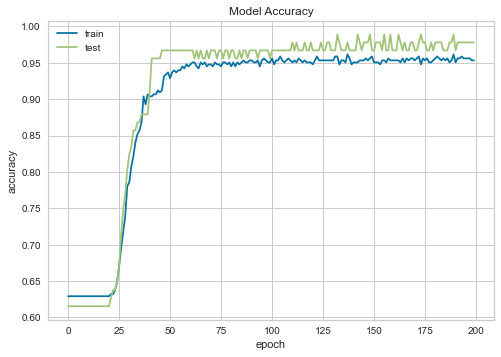

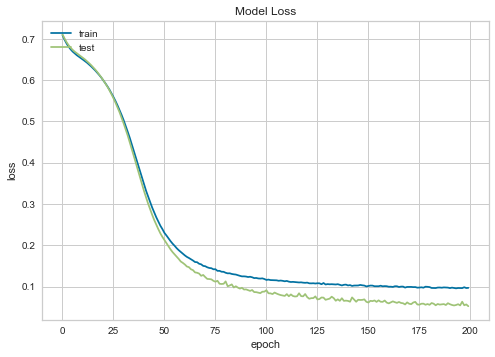

114/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [176]:
best_model = KerasClassifier(build_fn=build_best_classifier)
# Fit the model
start = time.perf_counter()
history = best_model.fit(rp_7_Xt_train, y_train, validation_split=0.2, epochs=200, batch_size=10, verbose=0)
nn_rp_run_time = time.perf_counter() - start
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
best_model.score(rp_7_Xt_test, y_test)
print(nn_rp_run_time)

# NN with SVD

In [15]:
svd6 = TruncatedSVD(n_components=6, random_state = 0)

svd_6_Xt_train = svd6.fit_transform(X_train_norm)
svd_6_Xt_test = svd6.fit_transform(X_test_norm)

In [16]:
def build_best_classifier(learn_rate=0.01, momentum=0, hidden_layer_size=10):
    # Initialising the ANN
    classifier = Sequential()
    # Adding the input layer and the first hidden layer
    classifier.add(Dense(units = 6, activation = 'relu', input_dim=6))

    classifier.add(Dense(units = hidden_layer_size, activation = 'relu'))

    classifier.add(Dense(1, activation = 'sigmoid'))
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    classifier.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return classifier

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


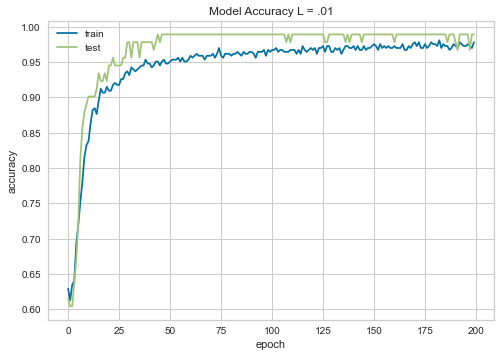

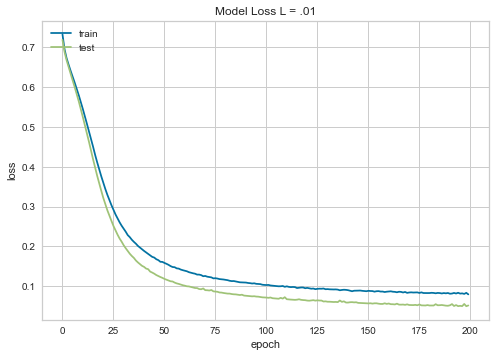

114/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.85087717

In [17]:
best_model = KerasClassifier(build_fn=build_best_classifier)
# Fit the model
history = best_model.fit(svd_6_Xt_train, y_train, validation_split=0.2, epochs=200, batch_size=10, verbose=0)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy L = .01')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss L = .01')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
best_model.score(svd_6_Xt_test, y_test)

# NN with K-Means/PCA

In [93]:
km = KMeans(n_clusters=2,
            random_state=0,
           )
pca_6 = PCA(
    n_components=6,
    random_state=0,
)
pca_6_Xt_with_cluster = helpers.add_cluster_label(km, pca_6, X_norm)

In [94]:
pca_6_Xt_with_cluster

array([[ 1.38702121,  0.42689533, -0.54170263, ..., -0.07219828,
         0.19081733,  1.        ],
       [ 0.46230825, -0.55694674, -0.20517459, ...,  0.01611117,
         0.01560321,  1.        ],
       [ 0.95462147, -0.10970115, -0.1478484 , ..., -0.03379855,
         0.06906129,  1.        ],
       ...,
       [ 0.22631131, -0.28794577,  0.31522402, ...,  0.21851685,
        -0.08000572,  1.        ],
       [ 1.67783369,  0.33594595,  0.29611602, ...,  0.07020412,
         0.10905787,  1.        ],
       [-0.90506804, -0.10410875,  0.38285994, ...,  0.07298625,
         0.19665977,  0.        ]])

In [95]:
pca_6_Xt_with_cluster_train, pca_6_Xt_with_cluster_test, y_train, y_test = train_test_split(pca_6_Xt_with_cluster, y, test_size=0.2, random_state=0, stratify=y)

In [96]:
def build_best_classifier(learn_rate=0.01, momentum=0, hidden_layer_size=10):
    # Initialising the ANN
    classifier = Sequential()
    # Adding the input layer and the first hidden layer
    classifier.add(Dense(units = 7, activation = 'relu', input_dim=7))

    classifier.add(Dense(units = hidden_layer_size, activation = 'relu'))

    classifier.add(Dense(1, activation = 'sigmoid'))
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    classifier.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return classifier

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


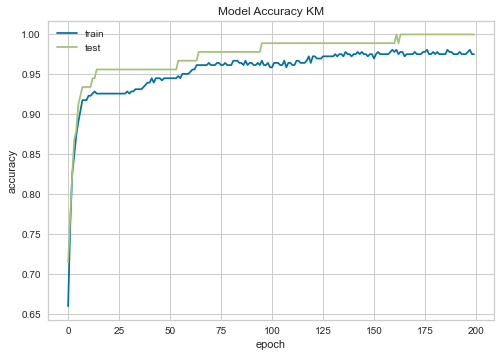

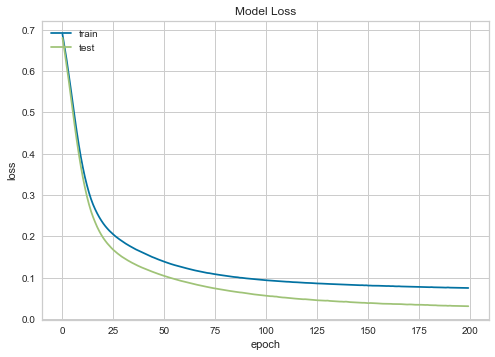

114/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.92105263

In [98]:
best_model = KerasClassifier(build_fn=build_best_classifier)
# Fit the model
history = best_model.fit(pca_6_Xt_with_cluster_train, y_train, validation_split=0.2, epochs=200, batch_size=10, verbose=0)
joblib.dump(history.history, "results/nn_km_pca.pkl")
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy KM')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
best_model.score(pca_6_Xt_with_cluster_test, y_test)

# NN with K-Means/ICA

In [99]:
km = KMeans(n_clusters=2,
            random_state=0,
           )
ica29 = FastICA(
    random_state=0,
    n_components=29,
)
ica_29_Xt = ica29.fit_transform(X_preprocessed)
km.fit(ica_29_Xt)
y_km = km.predict(ica_29_Xt)

In [100]:
ica_29_Xt_with_cluster = np.zeros((569, 30))

In [101]:
for i, row in enumerate(ica_29_Xt):
    ica_29_Xt_with_cluster[i] = np.append(row, y_km[i])

In [102]:
ica_29_Xt_with_cluster_train, ica_29_Xt_with_cluster_test, y_train, y_test = train_test_split(ica_29_Xt_with_cluster, y, test_size=0.2, random_state=0, stratify=y)

In [103]:
def build_best_classifier(learn_rate=0.01, momentum=0, hidden_layer_size=10):
    # Initialising the ANN
    classifier = Sequential()
    # Adding the input layer and the first hidden layer
    classifier.add(Dense(units = 30, activation = 'relu', input_dim=30))

    classifier.add(Dense(units = hidden_layer_size, activation = 'relu'))

    classifier.add(Dense(1, activation = 'sigmoid'))
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    classifier.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return classifier

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


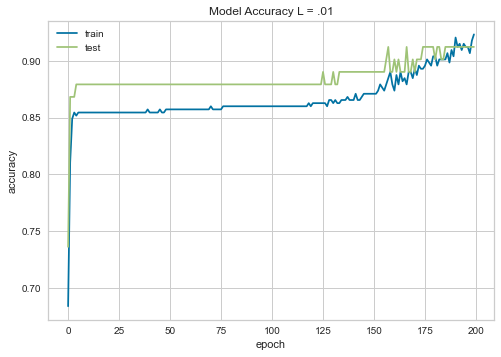

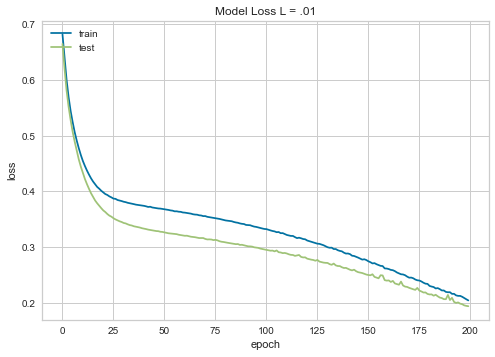

114/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.9035088

In [104]:
best_model = KerasClassifier(build_fn=build_best_classifier)
# Fit the model
history = best_model.fit(ica_29_Xt_with_cluster_train, y_train, validation_split=0.2, epochs=200, batch_size=10, verbose=0)
joblib.dump(history.history, "results/nn_km_ica.pkl")

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy L = .01')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss L = .01')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
best_model.score(ica_29_Xt_with_cluster_test, y_test)

# NN with K-Means/RP

In [126]:
km = KMeans(n_clusters=2,
            random_state=0,
           )
rp7 = SparseRandomProjection(n_components=7, random_state = 0)
rp_7_Xt_with_cluster = helpers.add_cluster_label(km, rp7, X_norm)

In [127]:
rp_7_Xt_with_cluster_train, rp_7_Xt_with_cluster_test, y_train, y_test = train_test_split(rp_7_Xt_with_cluster, y, test_size=0.2, random_state=0, stratify=y)

In [128]:
def build_best_classifier(learn_rate=0.01, momentum=0, hidden_layer_size=10):
    # Initialising the ANN
    classifier = Sequential()
    # Adding the input layer and the first hidden layer
    classifier.add(Dense(units = 8, activation = 'relu', input_dim=8))

    classifier.add(Dense(units = hidden_layer_size, activation = 'relu'))

    classifier.add(Dense(1, activation = 'sigmoid'))
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    classifier.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return classifier

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


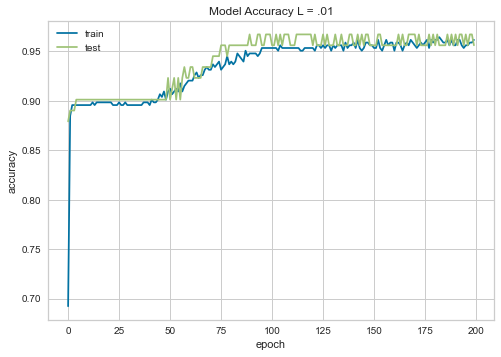

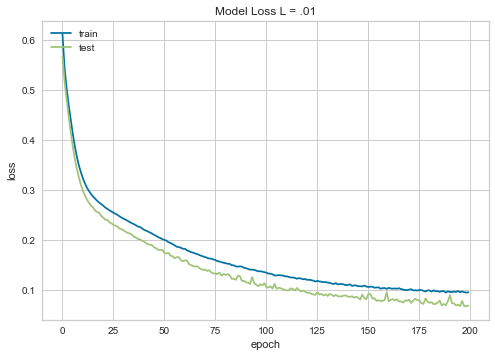

114/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.9298246

In [129]:
best_model = KerasClassifier(build_fn=build_best_classifier)
# Fit the model
history = best_model.fit(rp_7_Xt_with_cluster_train, y_train, validation_split=0.2, epochs=200, batch_size=10, verbose=0)
joblib.dump(history.history, "results/nn_km_rp.pkl")

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy L = .01')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss L = .01')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
best_model.score(rp_7_Xt_with_cluster_test, y_test)

# NN with K-Means/SVD

In [130]:
km = KMeans(n_clusters=2,
            random_state=0,
           )
svd6 = TruncatedSVD(n_components=6, random_state = 0)
svd_6_Xt_with_cluster = helpers.add_cluster_label(km, svd6, X_norm)

In [131]:
svd_6_Xt_with_cluster_train, svd_6_Xt_with_cluster_test, y_train, y_test = train_test_split(svd_6_Xt_with_cluster, y, test_size=0.2, random_state=0, stratify=y)

In [132]:
def build_best_classifier(learn_rate=0.01, momentum=0, hidden_layer_size=10):
    # Initialising the ANN
    classifier = Sequential()
    # Adding the input layer and the first hidden layer
    classifier.add(Dense(units = 7, activation = 'relu', input_dim=7))

    classifier.add(Dense(units = hidden_layer_size, activation = 'relu'))

    classifier.add(Dense(1, activation = 'sigmoid'))
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    classifier.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return classifier

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


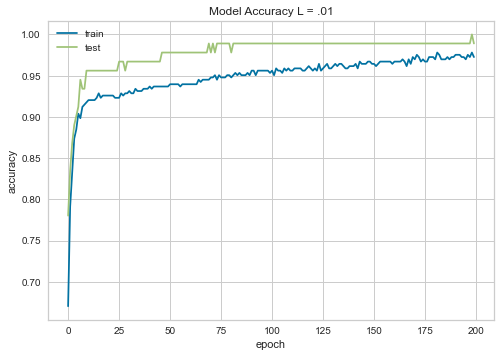

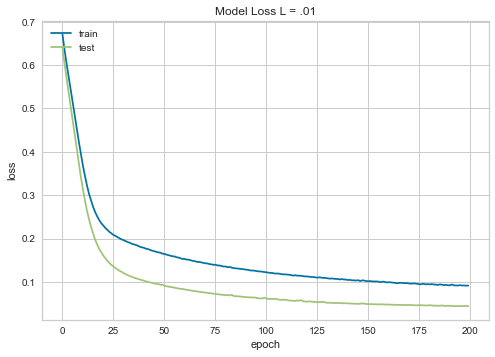

114/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.92105263

In [133]:
best_model = KerasClassifier(build_fn=build_best_classifier)
# Fit the model
history = best_model.fit(svd_6_Xt_with_cluster_train, y_train, validation_split=0.2, epochs=200, batch_size=10, verbose=0)
joblib.dump(history.history, "results/nn_km_svd.pkl")

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy L = .01')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss L = .01')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
best_model.score(svd_6_Xt_with_cluster_test, y_test)

# NN with EM/PCA

In [113]:
em = GaussianMixture(
        n_components=2,
        random_state=0,
        init_params='kmeans',
    )
pca_6 = PCA(
    n_components=6,
    random_state=0,
)
pca_6_Xt_with_cluster = helpers.add_cluster_label(em, pca_6, X_norm)

In [114]:
pca_6_Xt_with_cluster_train, pca_6_Xt_with_cluster_test, y_train, y_test = train_test_split(pca_6_Xt_with_cluster, y, test_size=0.2, random_state=0, stratify=y)

In [115]:
def build_best_classifier(learn_rate=0.01, momentum=0, hidden_layer_size=10):
    # Initialising the ANN
    classifier = Sequential()
    # Adding the input layer and the first hidden layer
    classifier.add(Dense(units = 7, activation = 'relu', input_dim=7))

    classifier.add(Dense(units = hidden_layer_size, activation = 'relu'))

    classifier.add(Dense(1, activation = 'sigmoid'))
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    classifier.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return classifier

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


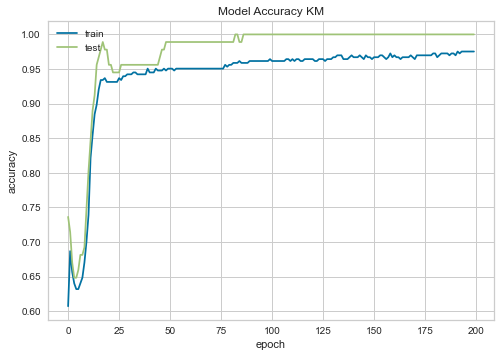

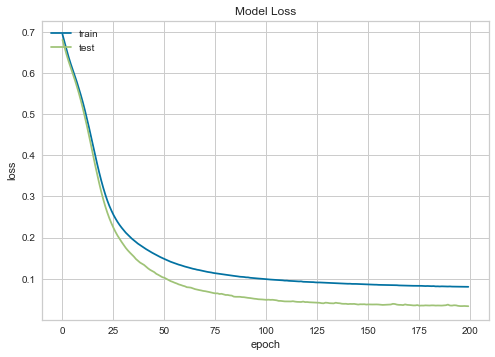

114/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.94736844

In [116]:
best_model = KerasClassifier(build_fn=build_best_classifier)
# Fit the model
history = best_model.fit(pca_6_Xt_with_cluster_train, y_train, validation_split=0.2, epochs=200, batch_size=10, verbose=0)
joblib.dump(history.history, "results/nn_em_pca.pkl")
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy KM')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
best_model.score(pca_6_Xt_with_cluster_test, y_test)

# NN with EM/ICA

In [118]:
em = GaussianMixture(
        n_components=2,
        random_state=0,
        init_params='kmeans',
    )
ica29 = FastICA(
    random_state=0,
    n_components=29,
)
ica_29_Xt_with_cluster = helpers.add_cluster_label(em, ica29, X_preprocessed)

In [119]:
ica_29_Xt_with_cluster_train, ica_29_Xt_with_cluster_test, y_train, y_test = train_test_split(ica_29_Xt_with_cluster, y, test_size=0.2, random_state=0, stratify=y)

In [120]:
def build_best_classifier(learn_rate=0.01, momentum=0, hidden_layer_size=10):
    # Initialising the ANN
    classifier = Sequential()
    # Adding the input layer and the first hidden layer
    classifier.add(Dense(units = 30, activation = 'relu', input_dim=30))

    classifier.add(Dense(units = hidden_layer_size, activation = 'relu'))

    classifier.add(Dense(1, activation = 'sigmoid'))
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    classifier.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return classifier

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


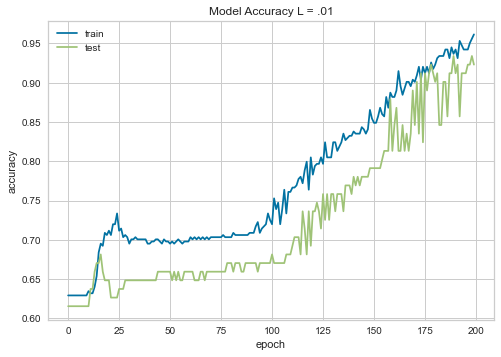

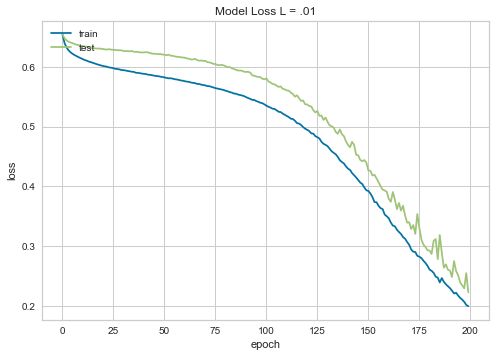

114/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.9035088

In [122]:
best_model = KerasClassifier(build_fn=build_best_classifier)
# Fit the model
history = best_model.fit(ica_29_Xt_with_cluster_train, y_train, validation_split=0.2, epochs=200, batch_size=10, verbose=0)
joblib.dump(history.history, "results/nn_em_ica.pkl")

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy L = .01')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss L = .01')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
best_model.score(ica_29_Xt_with_cluster_test, y_test)

# NN with EM/RP

In [138]:
em = GaussianMixture(
        n_components=2,
        random_state=0,
        init_params='kmeans',
    )
rp7 = SparseRandomProjection(n_components=7, random_state = 0)
rp_7_Xt_with_cluster = helpers.add_cluster_label(em, rp7, X_norm)

In [139]:
rp_7_Xt_with_cluster_train, rp_7_Xt_with_cluster_test, y_train, y_test = train_test_split(rp_7_Xt_with_cluster, y, test_size=0.2, random_state=0, stratify=y)

In [140]:
def build_best_classifier(learn_rate=0.01, momentum=0, hidden_layer_size=10):
    # Initialising the ANN
    classifier = Sequential()
    # Adding the input layer and the first hidden layer
    classifier.add(Dense(units = 8, activation = 'relu', input_dim=8))

    classifier.add(Dense(units = hidden_layer_size, activation = 'relu'))

    classifier.add(Dense(1, activation = 'sigmoid'))
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    classifier.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return classifier

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


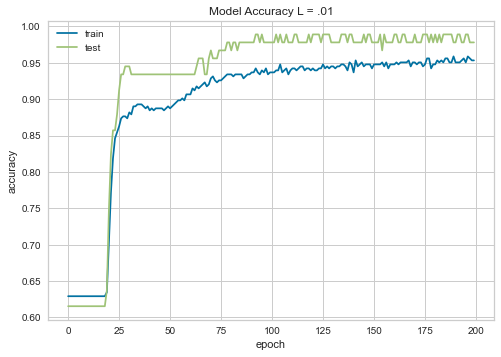

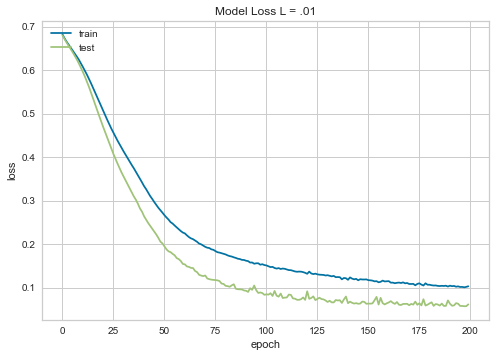

114/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.9385965

In [141]:
best_model = KerasClassifier(build_fn=build_best_classifier)
# Fit the model
history = best_model.fit(rp_7_Xt_with_cluster_train, y_train, validation_split=0.2, epochs=200, batch_size=10, verbose=0)
joblib.dump(history.history, "results/nn_em_rp.pkl")

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy L = .01')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss L = .01')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
best_model.score(rp_7_Xt_with_cluster_test, y_test)

# NN with EM/SVD

In [147]:
em = GaussianMixture(
        n_components=2,
        random_state=0,
        init_params='kmeans',
    )
svd6 = TruncatedSVD(n_components=6, random_state = 0)
svd_6_Xt_with_cluster = helpers.add_cluster_label(em, svd6, X_norm)

In [148]:
svd_6_Xt_with_cluster_train, svd_6_Xt_with_cluster_test, y_train, y_test = train_test_split(svd_6_Xt_with_cluster, y, test_size=0.2, random_state=0, stratify=y)

In [149]:
def build_best_classifier(learn_rate=0.01, momentum=0, hidden_layer_size=10):
    # Initialising the ANN
    classifier = Sequential()
    # Adding the input layer and the first hidden layer
    classifier.add(Dense(units = 7, activation = 'relu', input_dim=7))

    classifier.add(Dense(units = hidden_layer_size, activation = 'relu'))

    classifier.add(Dense(1, activation = 'sigmoid'))
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    classifier.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return classifier

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


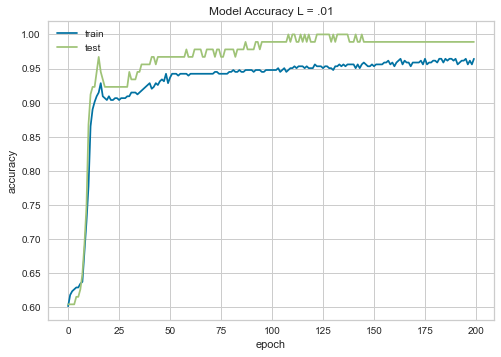

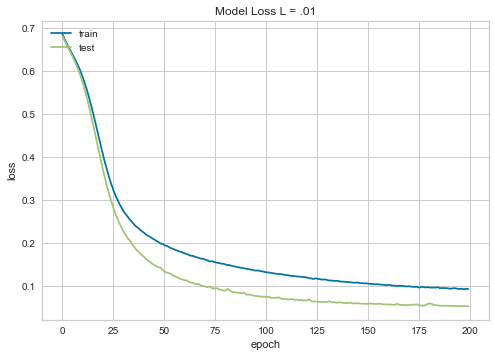

114/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.94736844

In [150]:
best_model = KerasClassifier(build_fn=build_best_classifier)
# Fit the model
history = best_model.fit(svd_6_Xt_with_cluster_train, y_train, validation_split=0.2, epochs=200, batch_size=10, verbose=0)
joblib.dump(history.history, "results/nn_em_svd.pkl")

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy L = .01')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss L = .01')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
best_model.score(svd_6_Xt_with_cluster_test, y_test)